

```
Please change runtime type as GPU
```



In [2]:
!pip install tensorflow --upgrade

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [3]:
!pip install tensorflow-gpu --upgrade

Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.0.0)


#`"Drug Review Dataset (Drugs.com)"`

## DESCRIZIONE
Il dataset contiene le recensioni di molti pazienti relativamente a specifici farmaci e particolari condizioni cliniche. Oltre alle recensioni è stato presente un punteggio da 1 a 10 che valuta l'efficacia del farmaco. I dati sono stati ottenuti raccogliendo le recensioni da diversi siti farmaceutici di review.

Lo scopo del dataset è quello di studiare come l'esperienza dei pazienti, raccontata attraverso le recensioni, abbia influenzato il voto (**sentiment analysis**). 

Il dataset contiene due file, il train set e il test set ripartiti secondo le proporzioni 75-25.

> URL: [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)    
Data di rilascio: 2018-10-04
Cratori e donatori: Surya Kallumadi, Felix Gräßer

**Citazioni**  
_Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. ''Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning''. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125

## Importazione del dataset

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [0]:
df_train = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
df_test = pd.read_csv('drugsComTest_raw.tsv', sep='\t')

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null float64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


**Attributi del dataset**

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful 

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
Unnamed: 0     53766 non-null int64
drugName       53766 non-null object
condition      53471 non-null object
review         53766 non-null object
rating         53766 non-null float64
date           53766 non-null object
usefulCount    53766 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


**In questo notebook ci interessa solamente predire il rating al farmaco sulla base del commento testuale lasciato dall'utente**

## Analisi delle informazioni disponibili

In [0]:
df_train.drop(columns='Unnamed: 0', inplace=True)
df_test.drop(columns='Unnamed: 0', inplace=True)

### Farmaci

In [64]:
df_train.drugName.value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Fluoridex                               1
Arcalyst                                1
Istalol                                 1
Ethacrynic acid                         1
Alefacept                               1
Name: drugName, Length: 3436, dtype: int64

**Più di tre mila farmaci**

### Condizioni patologiche

In [65]:
df_train.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Cluster-Tic Syndrome                                           1
Primary Hyperaldosteronism Diagnosis                           1
Strabismus                                                     1
48</span> users found this comment helpful.                    1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Name: condition, Length: 884, dtype: int64

**Quasi novecento tipi di condizioni patologiche**

### Date di review

In [66]:
df_train.date.value_counts()

March 1, 2016         146
September 23, 2015    141
January 13, 2016      138
January 7, 2017       136
August 3, 2016        135
                     ... 
February 24, 2008       5
October 20, 2008        5
December 7, 2017        4
May 17, 2008            1
December 20, 2008       1
Name: date, Length: 3579, dtype: int64

**Le recensioni coprono uno spettro di più di tremila giorni**

In [0]:
df_train.date = pd.to_datetime(df_train.date)

In [68]:
df_train.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37


In [0]:
df_train['year'] = df_train.date.dt.year

In [70]:
df_train.head()

,drugName,condition,review,rating,date,usefulCount,year
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,2012
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,2010
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,2009
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,2015
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,2016


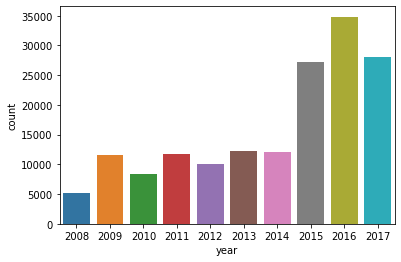

In [71]:
sns.countplot(x='year', data=df_train)

**Le recensioni sono state inserite dal 2008 al 2017**

### Rating

In [72]:
df_train.rating.value_counts()

10.0    50989
9.0     27531
1.0     21619
8.0     18890
7.0      9456
5.0      8013
2.0      6931
3.0      6513
6.0      6343
4.0      5012
Name: rating, dtype: int64

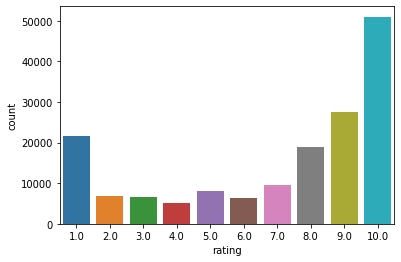

In [73]:
sns.countplot(x='rating', data=df_train)

**Dieci classi di rating**

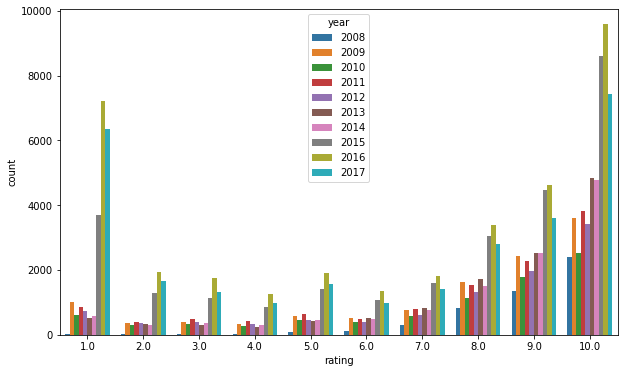

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='year', data=df_train)

### Reviews

In [75]:
df_train.review.head(10).values

array(['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
       '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."',
       '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But 

## Training & Validation

### Train/Test Split

In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical

print(tf.__version__)

2.0.0


In [77]:
X_train = df_train.review
y_train = df_train.rating

X_test = df_test.review
y_test = df_test.rating

print(f'Training set : {len(X_train):8d} ({len(X_train)/(len(X_train) + len(X_test)):.2%})')
print(f'Test set     : {len(X_test):8d} ({len(X_test)/(len(X_train) + len(X_test)):.2%})')

Training set :   161297 (75.00%)
Test set     :    53766 (25.00%)


**Un esempio di tokenization**

In [78]:
text = X_train.sample().values[0]

print(text)
print(text_to_word_sequence(text))

"I&#039;m on my second month on this medication and it is absolutely terrible, I&#039;m so hormonal and I feel depressed most of the time. My breasts are so tender it hurts to wear a bra or do anything. I would not recommend."
['i', '039', 'm', 'on', 'my', 'second', 'month', 'on', 'this', 'medication', 'and', 'it', 'is', 'absolutely', 'terrible', 'i', '039', 'm', 'so', 'hormonal', 'and', 'i', 'feel', 'depressed', 'most', 'of', 'the', 'time', 'my', 'breasts', 'are', 'so', 'tender', 'it', 'hurts', 'to', 'wear', 'a', 'bra', 'or', 'do', 'anything', 'i', 'would', 'not', 'recommend']


### Tokenization

**In questo notebook utilizzeremo le funzioni di trattamento del testo già incluse nella libreria `tensorflow.keras`. Comunemente si utilizzano anche `nltk` o `spacy`.

```If you use the pad_sequence to process the sequence, you will find the 0 is used as the padding value. In order to distinguish between PAD and UNKNOWN, keras use word_count+1 as the index of UNKNOWN.```

In [0]:
# oov_token: token to use for unknown words
tok = Tokenizer(oov_token='UNK')

# Build up the vocabulary for the entire training set
tok.fit_on_texts(X_train)

In [80]:
# word_counts: A dictionary of words and their counts.
print(tok.word_counts)

#word_docs: A dictionary of words and how many documents each appeared in
print(tok.document_count)

# word_index: A dictionary of words and their uniquely assigned integers
print(tok.word_index)

# document_count: An integer count of the total number of documents that were used to fit the Tokenizer
print(tok.word_docs)

OrderedDict([('it', 317806), ('has', 48477), ('no', 60196), ('side', 53581), ('effect', 11041), ('i', 856384), ('take', 43978), ('in', 126653), ('combination', 1578), ('of', 171741), ('bystolic', 247), ('5', 23983), ('mg', 15577), ('and', 431762), ('fish', 153), ('oil', 683), ('my', 292601), ('son', 2378), ('is', 112762), ('halfway', 189), ('through', 9521), ('his', 3154), ('fourth', 631), ('week', 28621), ('intuniv', 205), ('we', 8272), ('became', 4408), ('concerned', 940), ('when', 36718), ('he', 14074), ('began', 5164), ('this', 135824), ('last', 16118), ('started', 42347), ('taking', 51295), ('the', 407213), ('highest', 368), ('dose', 15770), ('will', 26882), ('be', 40493), ('on', 136965), ('for', 201832), ('two', 21553), ('days', 40314), ('could', 15016), ('hardly', 1413), ('get', 41397), ('out', 38437), ('bed', 6103), ('was', 176540), ('very', 39799), ('cranky', 188), ('slept', 1774), ('nearly', 2329), ('8', 9489), ('hours', 16097), ('a', 288920), ('drive', 7080), ('home', 3197),

In [81]:
MAX_WORDS = len(tok.word_index)
print('Unique words in the dataset: ', MAX_WORDS)

Unique words in the dataset:  51430


**Un esempio**

In [82]:
# Example of encoded tokens
t_encoded = tok.texts_to_sequences([text])[0]
print(t_encoded)

# Reverse index dictionary
reversed_word_map = dict(map(reversed, tok.word_index.items()))

# Example of decoded tokens
t_decoded = [reversed_word_map[i] for i in t_encoded]
print(t_decoded)

[2, 9, 35, 14, 7, 270, 89, 14, 15, 82, 3, 6, 20, 406, 297, 2, 9, 35, 25, 949, 3, 2, 66, 356, 213, 13, 4, 59, 7, 653, 76, 25, 1229, 6, 1316, 5, 817, 8, 4191, 61, 90, 268, 2, 68, 24, 196]
['i', '039', 'm', 'on', 'my', 'second', 'month', 'on', 'this', 'medication', 'and', 'it', 'is', 'absolutely', 'terrible', 'i', '039', 'm', 'so', 'hormonal', 'and', 'i', 'feel', 'depressed', 'most', 'of', 'the', 'time', 'my', 'breasts', 'are', 'so', 'tender', 'it', 'hurts', 'to', 'wear', 'a', 'bra', 'or', 'do', 'anything', 'i', 'would', 'not', 'recommend']


In [0]:
# Tokenize all the dataset
X_train_tok = tok.texts_to_sequences(X_train)

**Lunghezza delle frasi tokenizzate**

In [0]:
# Length of tokenized sentences
tokens_len = np.array([len(t) for t in X_train_tok])

**Lunghezza media**

In [85]:
print(f'Mean sentence length: {np.mean(tokens_len):.1f}')

Mean sentence length: 88.8


**Lunghezza massima**

In [86]:
MAX_PHRASE_LEN = np.max(tokens_len)
print(f'Maximum sentence length: {MAX_PHRASE_LEN}')

Maximum sentence length: 2034


In [87]:
# Sentences with maximum length
idx = np.where(tokens_len == MAX_PHRASE_LEN)[0]
print(X_train[idx].values)

['"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational v

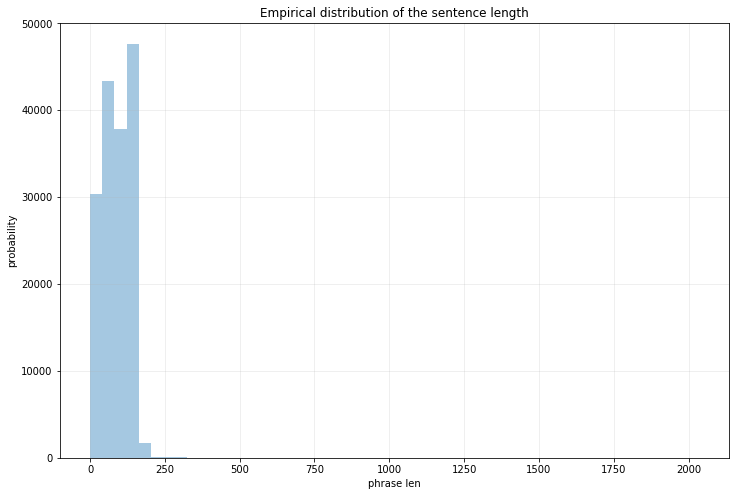

In [88]:
plt.figure(figsize = (12, 8))
sns.distplot(tokens_len, kde=False, rug=False)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.title('Empirical distribution of the sentence length')
plt.grid(alpha = 0.25)

**Vediamo quanti frasi hanno lunghezza superiore a 300 parole**

In [89]:
# Sentences with length more than the threshold
threshold = 500
idxs = np.where(tokens_len > threshold)[0]
print(f'Sentencies with more than {threshold} words: {len(idxs)} ({len(idxs)/len(X_train):.3%})')

Sentencies with more than 500 words: 34 (0.021%)


**Riunciamo ad ottenere probabilmente buone performance per lo 0.07% del dataset a scapito però di una rilevante riduzione della dimensionalità del modello.**

In [0]:
MAX_PHRASE_LEN = threshold

### Padding

**Applichiamo il padding per frasi più corte mentre tronchiamo quelle più lunghe**

In [0]:
X_train_tok = pad_sequences(X_train_tok, maxlen=MAX_PHRASE_LEN)

X_test_tok = pad_sequences(tok.texts_to_sequences(X_test), maxlen=MAX_PHRASE_LEN)

### Variabile Target

In [0]:
TARGET_LABELS = len(np.unique(y_train))

# to_categorical builds up the matrix starting from label 0
y_train_enc = to_categorical(y_train.apply(lambda x: x-1))
y_test_enc = to_categorical(y_test.apply(lambda x: x-1))

### LSTM Model

[**La teoria delle reti neurali ricorrenti**](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

![RNN](http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

In [0]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

**Iper-parametri di training**

In [0]:
EPOCHS = 15
BATCH_SIZE = 64
LEARNING_RATE = 1e-4

**Definizione del modello**

In [0]:
tf.keras.backend.clear_session()

In [0]:
model_lstm = Sequential(name='LSTM_Model')
model_lstm.add(Embedding(input_dim=MAX_WORDS+1, input_length=MAX_PHRASE_LEN, output_dim=64))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(TARGET_LABELS, activation='softmax'))

In [0]:
# Compile the model
model_lstm.compile(loss='categorical_crossentropy',    
                   optimizer=Adam(learning_rate=LEARNING_RATE),
                   metrics=['accuracy'])

In [98]:
model_lstm.summary()

Model: "LSTM_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           3291584   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 3,329,418
Trainable params: 3,329,418
Non-trainable params: 0
_________________________________________________________________


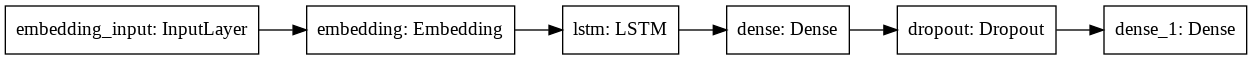

In [99]:
plot_model(model_lstm, 'computational_graph.png', show_shapes=False, rankdir='LR')

**Alleniamo il modello!!**

In [0]:
log_dir = './logs'
os.makedirs(log_dir, exist_ok=True)

# Some useful callbacks
tensorboard = TensorBoard(log_dir)
checkpoint = ModelCheckpoint(filepath=f'{log_dir}/model.hdf5', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [101]:
history = model_lstm.fit(x=X_train_tok,
                         y=y_train_enc,
                         validation_split=0.3,
                         epochs = EPOCHS,
                         batch_size = BATCH_SIZE,
                         callbacks=[checkpoint, tensorboard, early_stopping])

Train on 112907 samples, validate on 48390 samples
Epoch 1/15
112907/112907 [==============================] - 272s 2ms/sample - loss: 1.9275 - accuracy: 0.3317 - val_loss: 1.8330 - val_accuracy: 0.3753
Epoch 2/15
112907/112907 [==============================] - 270s 2ms/sample - loss: 1.7177 - accuracy: 0.4016 - val_loss: 1.6727 - val_accuracy: 0.4076
Epoch 3/15
112907/112907 [==============================] - 269s 2ms/sample - loss: 1.6219 - accuracy: 0.4170 - val_loss: 1.6417 - val_accuracy: 0.4133
Epoch 4/15
112907/112907 [==============================] - 269s 2ms/sample - loss: 1.5601 - accuracy: 0.4332 - val_loss: 1.5948 - val_accuracy: 0.4282
Epoch 5/15
112907/112907 [==============================] - 267s 2ms/sample - loss: 1.5096 - accuracy: 0.4477 - val_loss: 1.6180 - val_accuracy: 0.4301
Epoch 6/15
112907/112907 [==============================] - 270s 2ms/sample - loss: 1.4727 - accuracy: 0.4582 - val_loss: 1.5789 - val_accuracy: 0.4342
Epoch 7/15
112907/112907 [===========

In [0]:
def plot_graphs(history, string):
    epochs = len(history.history[string])
    plt.plot(history.history[string], c='blue')
    plt.plot(history.history['val_'+string], '', c='red')
    plt.xticks(ticks=range(0, epochs))
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.title(f'Training and validation {string}', fontsize=13)
    plt.show()

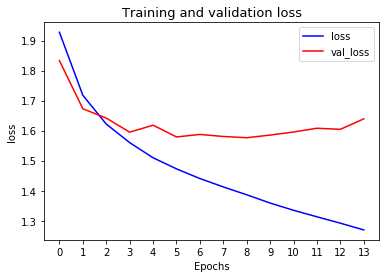

In [113]:
plot_graphs(history, 'loss')

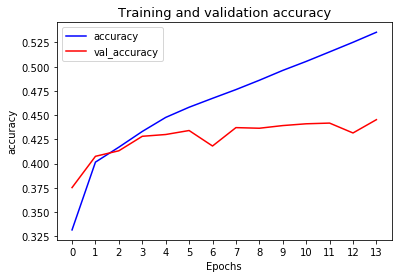

In [114]:
plot_graphs(history, 'accuracy')

### Model Validation

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:
def class_report(y_true, y_pred):
    print(classification_report(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1)), '\n')
    
    # Compute confusion matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(y_pred, axis=1))
    print('Confusion Matrix\n', cm)
    
    # Plot confusion matrix 
    plot_confusion_matrix(cm=cm, target_names=np.unique(np.argmax(y_true, axis=1)))

In [0]:
best_model_lstm = tf.keras.models.load_model(f'{log_dir}/model.hdf5')

In [0]:
y_pred = best_model_lstm.predict(X_test_tok)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.49      0.81      0.61      7299
           1       0.10      0.00      0.00      2334
           2       0.12      0.01      0.02      2205
           3       0.00      0.00      0.00      1659
           4       0.17      0.26      0.21      2710
           5       0.00      0.00      0.00      2119
           6       0.16      0.10      0.12      3091
           7       0.24      0.28      0.26      6156
           8       0.33      0.26      0.29      9177
           9       0.59      0.73      0.65     17016

    accuracy                           0.44     53766
   macro avg       0.22      0.24      0.22     53766
weighted avg       0.36      0.44      0.39     53766
 

Confusion Matrix
 [[ 5879     8    51     0   416     0    66   194    67   618]
 [ 1464     3    29     0   402     0    64   138    43   191]
 [ 1114     3    24     0   467     0   118   208    68   203]
 [  588     2    16     0   418 

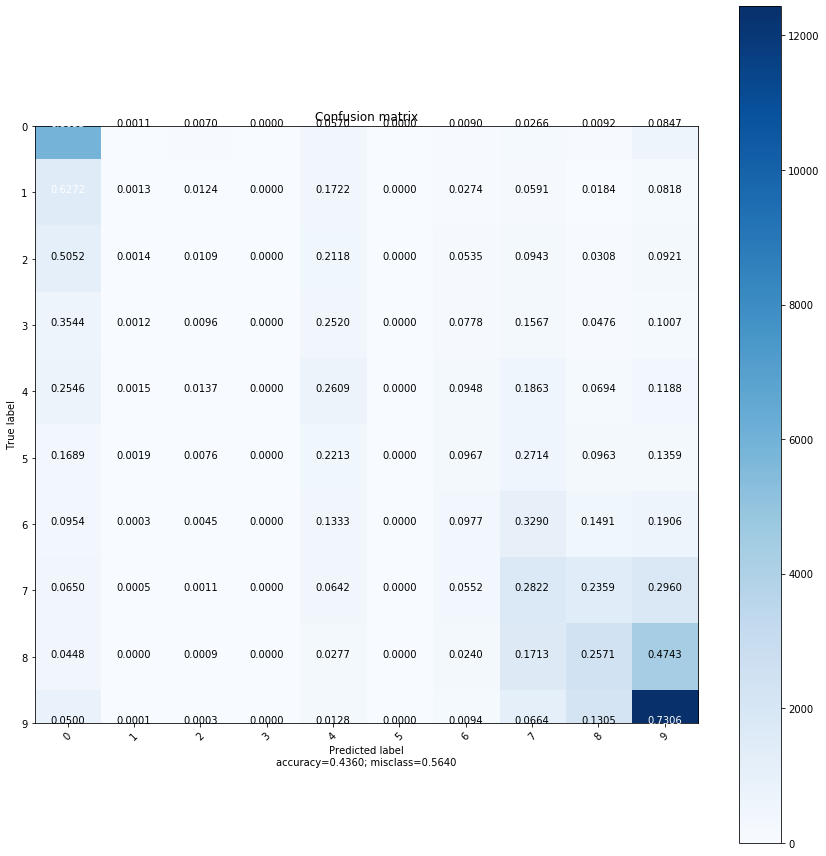

In [120]:
class_report(y_test_enc, y_pred)

## Fonti

> `"Deep Learning"`, Ian Goodfellow, Yoshua Bengio, Aaron Courville

# Completed Notebook

In [121]:
import datetime
print('Completed running this Notebook at:', datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Completed running this Notebook at: 2019-11-06 10:02:50
